## Census data classification

In [1]:
#Importing the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
#IMPORT THE DATA
# assigning columns names 
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
# Reading the Dataset
train = pd.read_csv('train.csv', names=columns)
test = pd.read_csv('test.csv', names=columns, skiprows=1)

# To see the description of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Take a quick look at the statistical description of the dataset
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
## Take a quick look at the statistical description of the dataset
test.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# data transforming 

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))


In [6]:
#REMOVE UNKNOWNS(?) replacing with nan
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [7]:
# Checking null values
# Sum gives us the count of the null values in the particular column
df.isnull().sum()

Age                  0
Workclass         2799
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     857
Income               0
dtype: int64

In [8]:
# checking summary statistics
df.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.160538
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.367108
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
# checking the datatypes for each column
df.dtypes

Age                int64
Workclass         object
fnlgwt             int64
Education         object
Education num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours/Week         int64
Native country    object
Income             int64
dtype: object

## Dummification

In [10]:
# converting categorical columns into binary by dummyfication

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


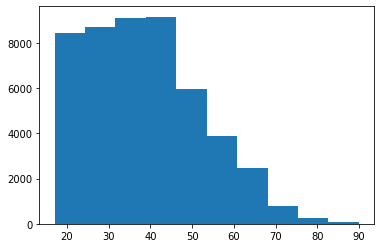

In [11]:
# Visualizations 
plt.hist(dff['Age']);

In [12]:
# converting target column into binary 
dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

# replacing '?' with nan
dff.replace(' ?', np.nan, inplace=True)

In [13]:
#  treating nan values
dff.fillna(' 0', inplace=True)

In [14]:
# checking null values
# Sum gives us the count of the null values in the particular column
df.isnull().sum()

Age                                           0
fnlgwt                                        0
Education num                                 0
Capital Gain                                  0
Capital Loss                                  0
Hours/Week                                    0
Income                                        0
Workclass: Federal-gov                        0
Workclass: Local-gov                          0
Workclass: Never-worked                       0
Workclass: Private                            0
Workclass: Self-emp-inc                       0
Workclass: Self-emp-not-inc                   0
Workclass: State-gov                          0
Workclass: Without-pay                        0
Marital Status: Divorced                      0
Marital Status: Married-AF-spouse             0
Marital Status: Married-civ-spouse            0
Marital Status: Married-spouse-absent         0
Marital Status: Never-married                 0
Marital Status: Separated               

In [15]:
# Preparing data for Training and testing 

X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

In [16]:
#Splitting data as train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124421)

## Logistic Regression model

In [17]:
#LOGISTIC REGRESSION
# importing library to apply logistic regression algorithm
from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# printing Results for model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[5564 2666]
 [ 189 1350]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8230
           1       0.34      0.88      0.49      1539

    accuracy                           0.71      9769
   macro avg       0.65      0.78      0.64      9769
weighted avg       0.87      0.71      0.75      9769

The Accuracy for Logistic Regression is 0.7077490019449278


## KNN model

In [19]:
# importing library to apply KNN algorithm
from sklearn import preprocessing, neighbors
# Importing ML packages and accuracy metrics
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

In [20]:
# printing Results for model

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[7701  529]
 [1031  508]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8230
           1       0.49      0.33      0.39      1539

    accuracy                           0.84      9769
   macro avg       0.69      0.63      0.65      9769
weighted avg       0.82      0.84      0.83      9769

The Accuracy for KNN is 0.8403111884532706


## Decision Tree model

In [21]:
# Decision tree 
# importing library to apply decision tree algorithm with default parameters
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier()

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

# printing Results for model
print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[7283  947]
 [ 881  658]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      8230
           1       0.41      0.43      0.42      1539

    accuracy                           0.81      9769
   macro avg       0.65      0.66      0.65      9769
weighted avg       0.82      0.81      0.81      9769

The Accuracy for Decision Tree Model is 0.8128774695465247


## Decision Tree with Hyperparameters

In [22]:
# building decision tree model with 'max_depth' as '4' , 'class_weight' as 'balanced'

clf_tree1 = DecisionTreeClassifier(max_depth =4 , class_weight = 'balanced')

clf_tree1.fit( X_train, y_train )
tree_predict1 = clf_tree1.predict( X_test )
metrics.accuracy_score( y_test, tree_predict1 )

# printing Results for model
print(confusion_matrix(y_test,tree_predict1))
print(classification_report(y_test,tree_predict1))
DTA = accuracy_score(y_test, tree_predict1)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[5575 2655]
 [ 178 1361]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8230
           1       0.34      0.88      0.49      1539

    accuracy                           0.71      9769
   macro avg       0.65      0.78      0.64      9769
weighted avg       0.87      0.71      0.75      9769

The Accuracy for Decision Tree Model is 0.7100010236462279
